<center>
<h1><b>Lab 2</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>September 11, 2020</b></h3>
</center>

## Imports

In [138]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 2D Euler Scheme

In [139]:
def euler_step(f, y, t, dt, *args):
    return y + f(y, t, *args) * dt

In [140]:
def euler(
    fun: callable, 
    t: np.ndarray, 
    y0: np.ndarray, 
    terminate = lambda x, y : False,
    step: callable = ) -> tuple:
    
    t = np.asarray(t)  # Ensure t is a Numpy array
    y = np.zeros((np.size(t), np.size(y0)))  # Create our output data container
    y[0] = y0  # Set initial condition

    dt = t[1] - t[0]  # Assume independent variable points are equidistant
    terminated_at = -1  # Index of the terminated point

    for i in range(np.size(t)-1):
        y[i+1] = euler_step(fun, y[i], t[i], dt)
        # y[i+1] = y[i] + fun(y[i], t[i]) * dt  # Step forward

        if terminate(t[i], y[i]):  # Check termination condition
            terminated_at = i  # Set termination point
            break
    
    return t[:terminated_at], y[:terminated_at, :]

In [141]:
def df_isothermal(
    y: np.ndarray, 
    x: np.ndarray, 
    B2_m: float = 4.0e-5, 
    y0scale: float = 1.0e4, 
    g: float = 9.81):
    
    v = np.sqrt(y[2]**2 + y[3]**2)
    drag_factor = -B2_m * v * np.exp(-y[1] / y0scale)
    
    return np.asarray([y[2],
                       y[3],
                       drag_factor * y[2], 
                       -g + drag_factor * y[3]])

In [142]:
# assumes: i) drag force F = - B_2 * v^2
#          ii) isothermal air density model: rho(y) = rho(0) * exp(-y / y0)

def computeTrajectory(
    v0: float = 700., 
    theta: float = 45., 
    B2_m: float = 4e-5, 
    y0scale: float = 1e4, 
    dt: float = 0.01,
    g: float = 9.81) -> tuple:

    vx0 = v0 * np.cos(theta / 180. * np.pi)  # Convert initial conditions into an initial velocity
    vy0 = v0 * np.sin(theta / 180. * np.pi)  # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    y0 = np.asarray([0., 0., vx0, vy0])  # Set initial condition

    maxr = v0**2 / g   # max range of shell, in vaccuum (for automatic horizontal plot range)
    maxt = maxr / y0[2]  # flight time at maxr, in vacuum (for atomatic calculation end time)

    nsteps = np.round(maxt / dt)   # time steps
    t = np.linspace(0, maxt, nsteps)

    t, y_soln = euler(
        df_isothermal, 
        t, 
        y0, 
        terminate=lambda x, y : x > 0 and y[1] <= 0.)

    x, y = y_soln[:,0], y_soln[:,1]

    xmax = (y[-1] * x[-2] - y[-2] * x[-1] ) / (y[-1] - y[-2])
    x[-1] = xmax  # adjust  last point to keep y >= 0 in plots
    y[-1] = 0.

    i_ymax = np.argmax(y)

    return x, y, xmax, (x[i_ymax], y[i_ymax])

26590.853556586713
(14509.896897321716, 8192.580345676723)


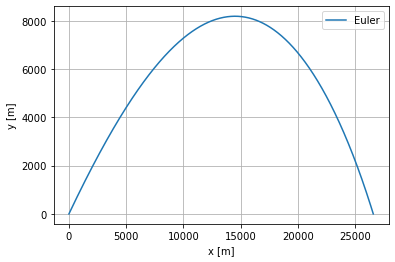

In [143]:
x, y, x_range, y_range = computeTrajectory()
print(x_range)
print(y_range)

plt.xlabel('x [m]')    # horizontal position
plt.ylabel('y [m]')    # vertical position
plt.title(titleString) # plot title
plt.plot(x, y, label = "Euler")
plt.legend()             # create legends
plt.grid()
plt.show()               # show plot
